In [1]:
import tensorflow as tf
import numpy as np
#from utils import build_model
import pandas as pd
from tqdm import tqdm
import imageio
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense
from keras.regularizers import l2

def build_model():
    '''
    Build PilotNet keras model
    
    Input:
        None
    
    Output:
        - keras_model: keras model with PilotNet architecture
    '''
    
    Lambda = 10**(-6)
    # build model
    Input = tf.keras.layers.Input(shape=(66, 200, 3,), name='image')
    x = Conv2D(24, kernel_size=(5, 5), activation='relu', strides=(2, 2), kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda))(Input)
    x = Dropout(.05)(x, training = True)
    #x = BatchNormalization()(x)
    x = Conv2D(36, kernel_size=(5, 5), activation='relu', strides=(2, 2), kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda))(x)
    x = Dropout(.05)(x, training = True)
    #x = BatchNormalization()(x)
    x = Conv2D(48, kernel_size=(5, 5), activation='relu', strides=(2, 2), kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda))(x)
    x = Dropout(.05)(x, training = True)
    #x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda))(x)
    #x = BatchNormalization()(x)
    x = Dropout(.05)(x, training = True)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda))(x)
    x = Flatten()(x, training = True)
    x = Dropout(0.05)(x, training = True)
    x = Dense(1164, kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda), activation='relu')(x)
    x = Dropout(0.05)(x, training = True)
    x = Dense(100, kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda), activation='relu')(x)
    x = Dropout(0.05)(x, training = True)
    x = Dense(50, kernel_regularizer=l2(Lambda), bias_regularizer=l2(Lambda), activation='relu')(x) 
    x = Dropout(0.05)(x, training = True)
    x = Dense(10, activation='relu')(x)
    Output = Dense(1, name = 'output_layer')(x)

    # compile
    keras_model = tf.keras.models.Model(
          inputs = [Input], outputs = [Output])
    
    return(keras_model)

checkpoint_path = '../../../../data/models/mc_dropout_cil/export'
model = build_model()
model.load_weights(tf.train.latest_checkpoint(checkpoint_path))


# all training images and paths
path_all_imgs = '../../../../commaai_code/02_write_shards_optional/cil_shards/df_paths.csv'
all_img_df = pd.read_csv(path_all_imgs)
img_path_base = '../../../../data/commaai/test_files/val_files_unfiltered/'
density_path= '../../../../data/commaai/density/gaussian_density.csv'
density = pd.read_csv(density_path)
all_img_df = all_img_df[np.abs(all_img_df['true_y']) < 40].reset_index()


In [2]:
mc_samples = 1000
preds = []
for i in tqdm(range(0, 200)):
    img = (imageio.imread(str(img_path_base + all_img_df.loc[i,'path']))[:,:,0:3]/255).reshape(1,66,200,3)
    x_pred = np.repeat(img, mc_samples, axis = 0)
    pred = model.predict(x_pred.reshape(-1,66,200,3))
    preds.append(pred)
preds = np.array(preds)

 44%|████▍     | 88/200 [08:07<10:20,  5.54s/it]


KeyboardInterrupt: 

In [3]:
preds_mc = np.mean(preds, axis = 1)

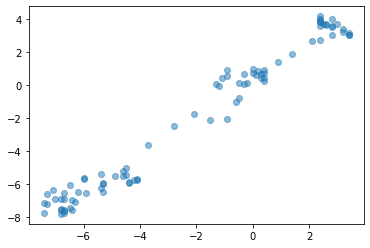

In [5]:
plt.scatter(all_img_df.loc[0:preds_mc.shape[0]-1,'true_y'], preds_mc.reshape(-1), alpha = 0.5)

In [ ]:
all_img_df.loc[0:19,'true_y']

In [ ]:
preds_mc.reshape(-1)

In [ ]:
indices = pd.read_csv('../../../../commaai_code/02_write_shards_optional/cil_shards/df_paths.csv')

In [ ]:
indices.loc[0,'path']